In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def joukowsky(x_cent,y_cent):
    '''Joukowsky airfoil components calculation (fixed radius)
    
    INPUTS:
    x_cent: float with the x-position of the center
    y_cent: float with the y-position of the center
    
    OUTPUT:
    x1:     cartesian coordinates for horizontal axis
    y1:     cartesian coordinates for vertical axis
    
    This function computes the cartesian coordinates of a Joukowsky 
    airfoil from the position of the center, having always the radius
    fixed so it can go through the points |0,1|
    '''
    
    # Circle parameters definition
    center = np.array([x_cent,y_cent])
    radius1 = np.sqrt((center[0]-1)**2+(center[1]-0)**2)
    # Second circle will be neglected

    # Circle coordinates calculations
    angle = np.linspace(0,2*np.pi,100)
    chi1 = center[0] + radius1*np.cos(angle)
    eta1 = center[1] + radius1*np.sin(angle)

    # Cartesian components of the Joukowsky transform
    x1 = ((chi1)*(chi1**2+eta1**2+1))/(chi1**2+eta1**2)
    y1 = ((eta1)*(chi1**2+eta1**2-1))/(chi1**2+eta1**2)

    return x1, y1

In [3]:
def airfoil_correction(x, y):
    '''Set the airfoil chord to 1 and the leading edge to (0,0)
    
    INPUT:
    x:     cartesian coordinates for horizontal axis
    y:     cartesian coordinates for vertical axis
    
    OUTPUT:
    xCorr: corrected cartesian coordinates for horizontal axis
    yCorr: corrected cartesian coordinates for vertical axis
    
    The function scales the airfoil to match the chord dimension to
    a value of 1 (proportionally scaling the vertical dimension). The
    leading edge of the airfoil is moved after to a position in (0,0)
    '''
    # Compute the scale factor (actual chord length)
    c = np.max(x)-np.min(x)
    
    # Leading edge current position
    LE = np.min(x/c)

    # Corrected position of the coordinates
    xCorr = x/c-LE
    yCorr = y/c
    
    return xCorr, yCorr

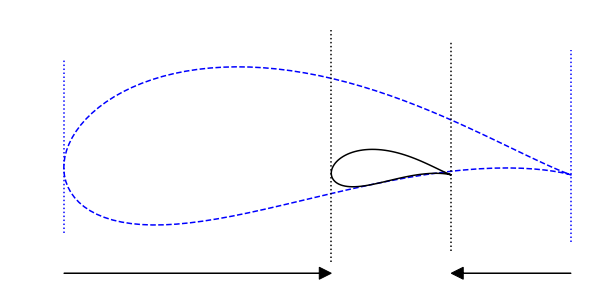

In [4]:
# compute a random Joukowsky airfoil
x1, y1 = joukowsky(-0.3, 0.2)

# correct the chord to be one
x, y = airfoil_correction(x1, y1)

fig, ax = plt.subplots(1, figsize = (10,5))
ax.plot(x1,y1,'b--')
ax.plot(x,y,'k')
ax.plot([x1.min(),x1.min()],[ax.get_ylim()[0],ax.get_ylim()[1]],'b:')
ax.plot([x1.max(),x1.max()],[ax.get_ylim()[0],ax.get_ylim()[1]],'b:')
ax.plot([1,1],[ax.get_ylim()[0],ax.get_ylim()[1]],'k:')
ax.plot([0,0],[ax.get_ylim()[0],ax.get_ylim()[1]],'k:')
ax.arrow(x1.min(),ax.get_ylim()[0],-x1.min()-0.1,0,head_width=0.1,head_length=0.1, color='k')
ax.arrow(x1.max(),ax.get_ylim()[0],1-x1.max()+0.1,0,head_width=0.1,head_length=0.1, color='k')
ax.axis('equal')
ax.axis('off');

In [5]:
# percentage of the chord to make the division
pc = 0.25

In [6]:
# get the x and y coordinates in the same array
points = np.vstack((x,y)).T
# given that airfoil starts at (1,0), it will be upper until it goes below zero
upper = points[:np.argwhere(y < 0)[0][0], :]
# the rest of the points will be lower surface
lower = points[np.argwhere(y < 0)[0][0]:, :]

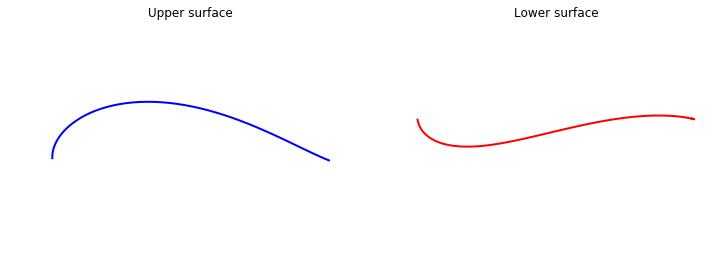

In [7]:
fig, ax = plt.subplots(1, 2 ,figsize = (12,4))
ax[0].plot(upper[:,0],upper[:,1],'b',lw=2)
ax[0].set_title('Upper surface')
ax[0].axis('equal')
ax[0].axis('off')
ax[1].plot(lower[:,0],lower[:,1],'r',lw=2)
ax[1].set_title('Lower surface')
ax[1].axis('equal')
ax[1].axis('off');

In [8]:
# now divide both surfaces depending on the selected percentage of the chord
# this will be used for the circle used in the inlet of the mesh
UL = upper[upper[:,0]<pc,:] # upper left
UR = upper[upper[:,0]>pc,:] # upper right
LL = lower[lower[:,0]<pc,:] # lower left
LR = lower[lower[:,0]>pc,:] # lower right

# sort the points depending of the x-coordinate (blockMeshDict purposes)
UL = UL[np.argsort(UL[:,0]),:]
UR = UR[np.argsort(UR[:,0]),:]
LL = LL[np.argsort(LL[:,0]),:]
LR = LR[np.argsort(LR[:,0]),:]

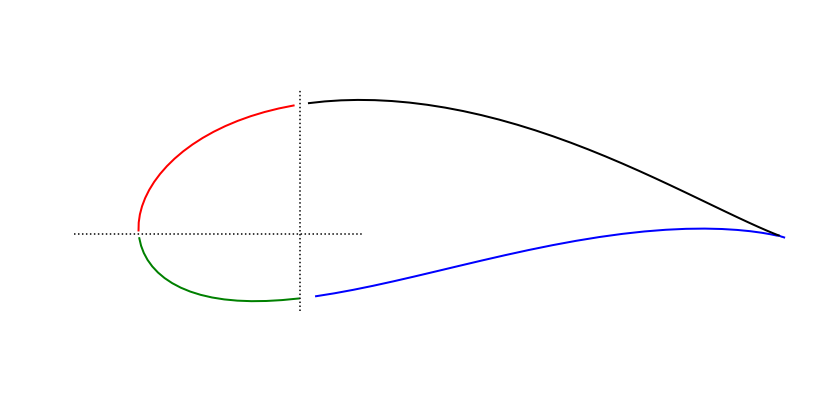

In [9]:
fig, ax = plt.subplots(1, figsize = (14,7))
ax.plot(UL[:,0],UL[:,1],'r',lw=2)
ax.plot(LL[:,0],LL[:,1],'g',lw=2)
ax.plot(LR[:,0],LR[:,1],'b',lw=2)
ax.plot(UR[:,0],UR[:,1],'k',lw=2)
ax.plot([-0.1,pc+0.1],[(UL[0,1]+LL[0,1])/2,(UL[0,1]+LL[0,1])/2],'k:')
ax.plot([pc,pc],[ax.get_ylim()[0],ax.get_ylim()[1]],'k:')
ax.axis('equal')
ax.axis('off');